In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [2]:
df1=pd.read_csv('C:\Mental Health\prevalence-by-mental-and-substance-use-disorder _AI.csv')
df2=pd.read_csv('C:\Mental Health\mental-and-substance-use-as-share-of-disease -AI.csv')
data=pd.merge(df1,df2)
data.head

<bound method NDFrame.head of            Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                              0.228979                          
1                                              0.228120                          
2                                              0.227328                          
3                                              0.226468                          
4                                              0.225567                          
...                                                 ...                          
6835       

In [3]:
data.isnull().sum()
data.drop('Code',axis=1,inplace=True)

In [4]:
data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','Durg_usage','Depression','Alcohol','Mental_fitness'],axis='columns',inplace=True)

[]

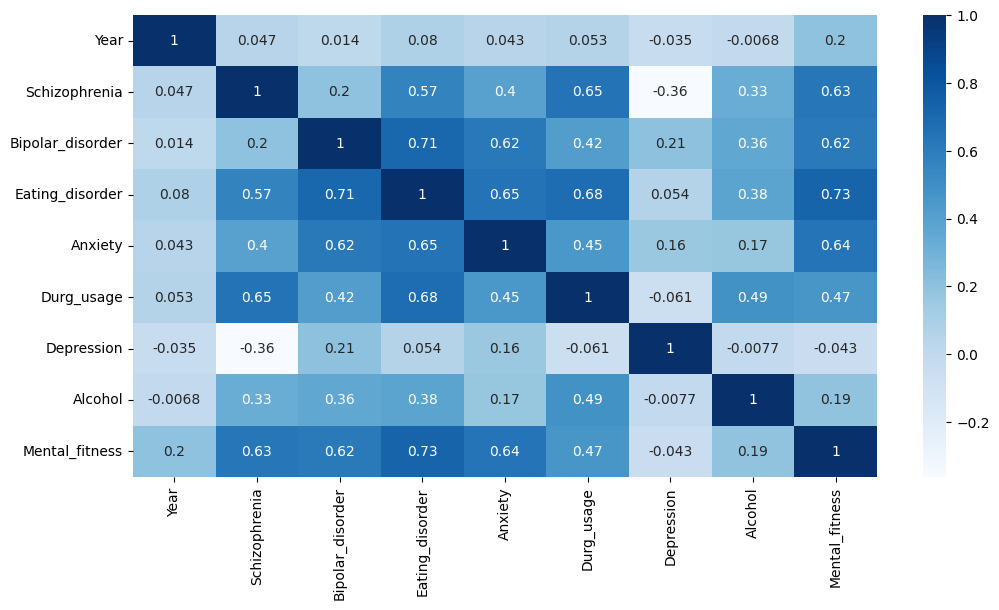

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

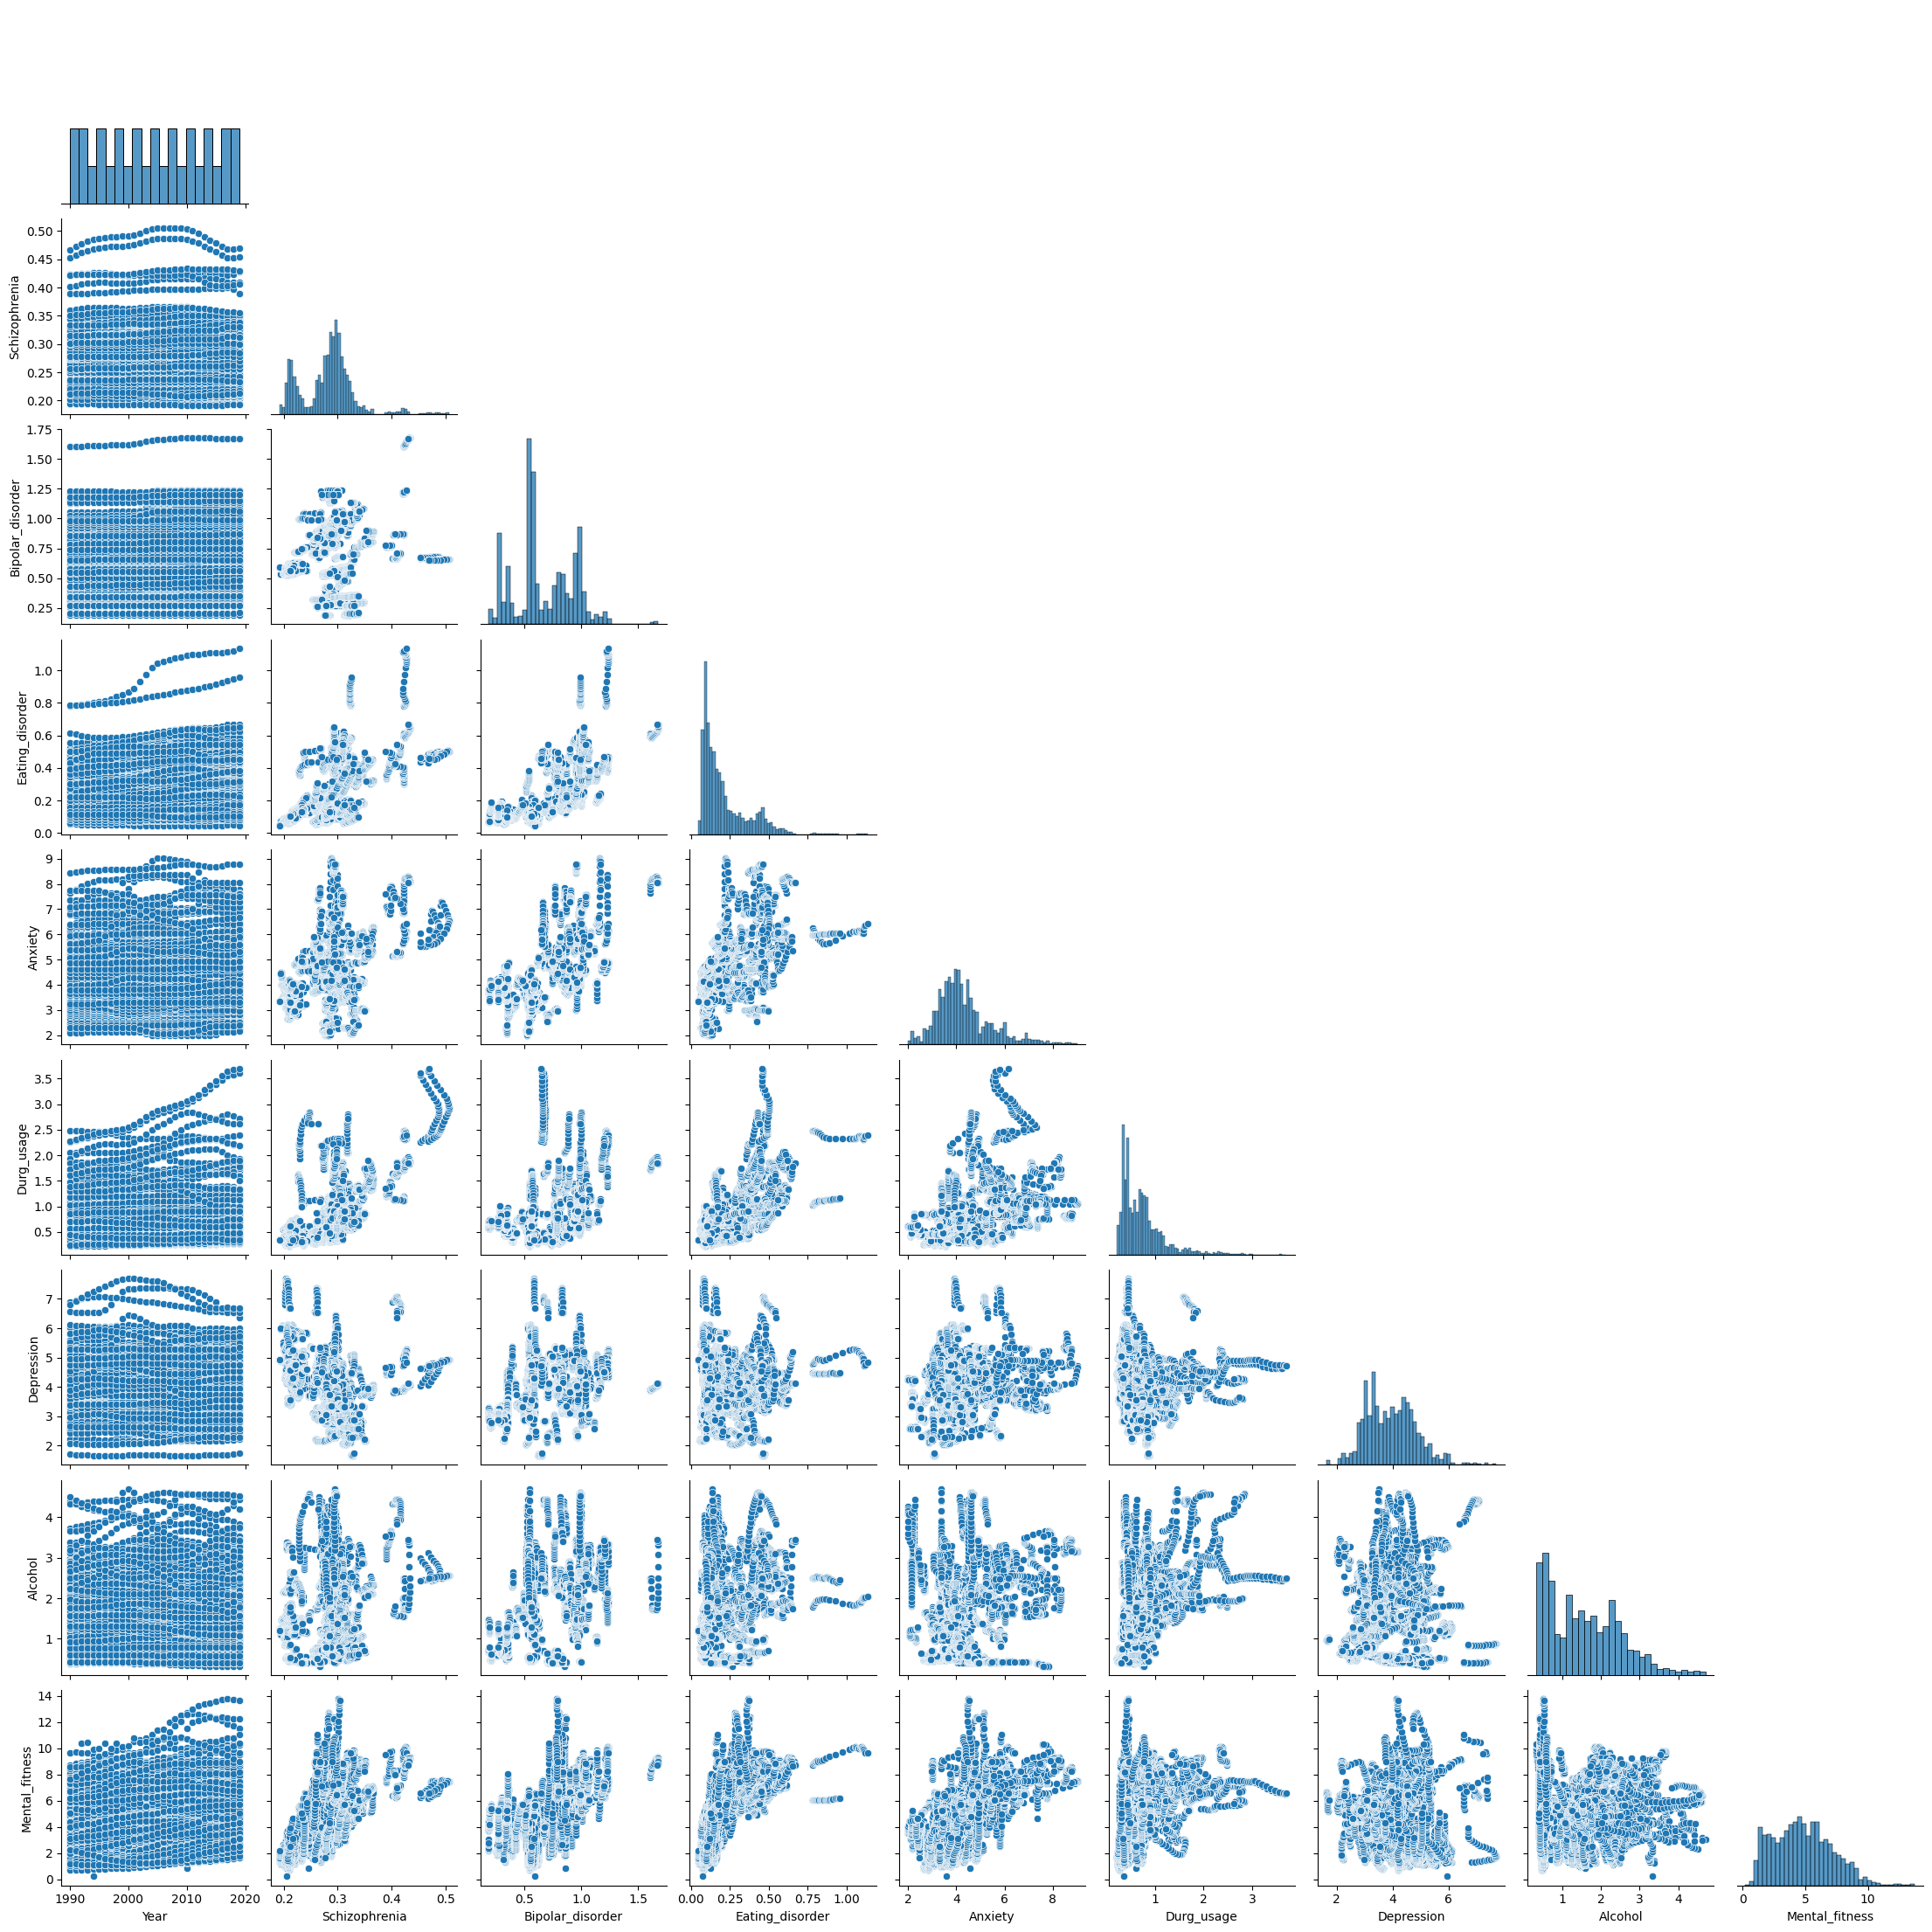

In [6]:
sns.pairplot(data,corner=True)
plt.show()

In [7]:
mean=data['Mental_fitness'].mean()
mean

4.8180618117506135

In [8]:
fig=px.pie(data,values='Mental_fitness',names='Year')
fig.show()

In [9]:
fig=px.line(data,x='Year',y='Mental_fitness',color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [10]:
df=data.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Durg_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [12]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=l.fit_transform(df[i])

In [13]:
df.shape

(6840, 10)

In [14]:
from sklearn.model_selection import train_test_split
x=df.drop('Mental_fitness',axis=1)
y=df['Mental_fitness']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20,random_state=2)

In [15]:
print(f"xtrain: {xtrain.shape} xtest: {xtest.shape} ytrain: {ytrain.shape} ytest: {ytest.shape}")

xtrain: (6820, 9) xtest: (20, 9) ytrain: (6820,) ytest: (20,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ytrain_pred=lr.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)
print(f"Linear regression model performance mse is {mse} rmse is {rmse} r2 score is {r2}")

Linear regression model performance mse is 1.3399913707005786 rmse is 1.1575799629833692 r2 score is 0.7453536323041361


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ytrain_pred=rf.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)
print(f"The Random mse is {mse} rmse is {rmse} r2 is {r2}")

The Random mse is 0.003688116610381994 rmse is 0.060729865884768704 r2 is 0.9992991257115473


In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR(kernel='linear')
svr.fit(xtrain, ytrain)
ytrain_pred = svr.predict(xtrain)

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mean_squared_error(ytrain, ytrain_pred))
r2 = r2_score(ytrain, ytrain_pred)

print(f"Support Vector Regression model performance:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2 Score: {r2:.4f}")

Support Vector Regression model performance:
MSE: 1.9447, RMSE: 1.3945, R^2 Score: 0.6304
